In [1]:
from sympy import *
from sympy.plotting import plot3d
import pandas as pd

In [2]:
column = ['Weigh', 'Power', 'Time']

In [3]:
data = pd.DataFrame({el : [] for el in column})
data

,Weigh,Power,Time


In [4]:
data.Weigh = [1945, 1495, 1570]
data.Power = [560, 340, 343]
data.Time = [4.3, 4.9, 5.2]
data.head()

,Weigh,Power,Time
0,1945,560,4.3
1,1495,340,4.9
2,1570,343,5.2


In [5]:
a2, a1, a0, x2, x1 = symbols('a2,a1,a0,x2,x1')

In [6]:
y = a2*x2 + a1*x1 + a0
y

a0 + a1*x1 + a2*x2

In [7]:
MSE_equations = [((y.subs({x2:el[0], x1:el[1]}) - el[2])**2)/len(data) for el in data.values]
MSE_equations

[1261008.33333333*(0.00051413881748072*a0 + 0.287917737789203*a1 + a2 - 0.00221079691516709)**2,
 745008.333333333*(0.000668896321070234*a0 + 0.22742474916388*a1 + a2 - 0.00327759197324415)**2,
 821633.333333333*(0.000636942675159236*a0 + 0.218471337579618*a1 + a2 - 0.00331210191082803)**2]

In [8]:
k = [a2, a1, a0]
k

[a2, a1, a0]

In [9]:
diff_MSE_equations = [sum([diff(mse, k_el) for mse in MSE_equations]) for k_el in k]
diff_MSE_equations

[3340.0*a0 + 1424006.66666667*a1 + 5655300.0*a2 - 15902.0,
 828.666666666667*a0 + 364566.0*a1 + 1424006.66666667*a2 - 3905.06666666667,
 2.0*a0 + 828.666666666667*a1 + 3340.0*a2 - 9.6]

In [10]:
koef = list(nonlinsolve(diff_MSE_equations, k))[0]
koef

(0.00447524752475029, -0.0118811881188077, 2.24910891089302)

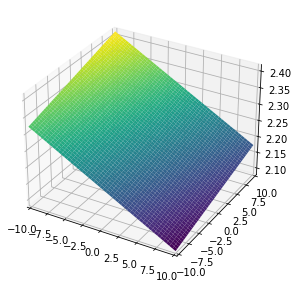

In [11]:
plot3d(y.subs({a2 : koef[0], a1 : koef[1], a0 : koef[2]}));

In [12]:
def predict(features, func, k):
    x_2, x_1 = features
    a_2, a_1, a_0 = k
    return func.subs({x2:x_2, x1:x_1, a2:a_2, a1:a_1, a0:a_0})

In [13]:
predict([1520, 431], y, koef)

3.93069306930733